In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

In [2]:
file = 'df_reduced.csv'
reduced = pd.read_csv(file)

In [3]:
reduced_more = pd.DataFrame(reduced)


In [4]:
searchfor_crime = ['CPW', 'ASSAULT', 'ROBBERY', 'CRIMINAL TRESPASS', 'PETIT LARCENY']

reduced_more_crime = reduced_more[reduced_more['SUSPECTED_CRIME_DESCRIPTION'].str.contains('|'.join(searchfor_crime))]
reduced_more_crime.head(3)

,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
5,6,21:25:00,February,Friday,CPW,10,Y,Y,(null),39,MALE,WHITE HISPANIC,MANHATTAN
6,7,20:00:00,February,Saturday,CPW,3,N,N,(null),19,FEMALE,BLACK,MANHATTAN
7,8,19:58:00,February,Saturday,CPW,3,N,Y,(null),15,FEMALE,BLACK,MANHATTAN


In [5]:
searchfor = ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN IS', '(null)']

reduced_more_crime_and_location = reduced_more_crime[reduced_more_crime['STOP_LOCATION_BORO_NAME'].str.contains('|'.join(searchfor))]
reduced_more_crime_and_location.tail(3)

C:\Users\cobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,STOP_FRISK_ID,STOP_FRISK_TIME,MONTH2,DAY2,SUSPECTED_CRIME_DESCRIPTION,STOP_DURATION_MINUTES,SUSPECT_ARRESTED_FLAG,FRISKED_FLAG,PHYSICAL_FORCE_WEAPON_IMPACT_FLAG,SUSPECT_REPORTED_AGE,SUSPECT_SEX,SUSPECT_RACE_DESCRIPTION,STOP_LOCATION_BORO_NAME
11624,11625,12:20:00,December,Friday,ROBBERY,10,Y,Y,(null),22,MALE,BLACK,(null)
11625,11626,4:10:00,December,Wednesday,CPW,5,N,Y,(null),31,MALE,WHITE HISPANIC,BROOKLYN
11626,11627,23:45:00,October,Saturday,CPW,2,Y,Y,(null),50,MALE,BLACK,(null)


In [6]:
reduced_more_crime_and_location['SUSPECTED_CRIME_DESCRIPTION'].value_counts()

CPW                  3151
ROBBERY              1708
ASSAULT              1307
CRIMINAL TRESPASS     956
PETIT LARCENY         852
Name: SUSPECTED_CRIME_DESCRIPTION, dtype: int64

In [7]:
reduced_more_crime_and_location['STOP_LOCATION_BORO_NAME'].value_counts()

BROOKLYN     2176
MANHATTAN    2003
BRONX        1810
QUEENS       1338
STATEN IS     365
(null)        282
Name: STOP_LOCATION_BORO_NAME, dtype: int64

In [39]:
cpw_df = reduced_more_crime_and_location.loc[reduced_more_crime_and_location["SUSPECTED_CRIME_DESCRIPTION"] == "CPW", :]
robbery_df = reduced_more_crime_and_location.loc[reduced_more_crime_and_location["SUSPECTED_CRIME_DESCRIPTION"] == "ROBBERY", :]
assault_df = reduced_more_crime_and_location.loc[reduced_more_crime_and_location["SUSPECTED_CRIME_DESCRIPTION"] == "ASSAULT", :]
criminal_trespass_df = reduced_more_crime_and_location.loc[reduced_more_crime_and_location["SUSPECTED_CRIME_DESCRIPTION"] == "CRIMINAL TRESPASS", :]
petit_df = reduced_more_crime_and_location.loc[reduced_more_crime_and_location["SUSPECTED_CRIME_DESCRIPTION"] == "PETIT LARCENY", :]

In [40]:
#reduced_more = reduced_more.drop(reduced_more['SUSPECTED_CRIME_DESCRIPTION'] != 'ASSAULT')

In [41]:
#boro = reduced.loc[
#boro.head(3)

In [42]:
#clean_df = pd.merge(boro, top, on="STOP_FRISK_ID")
#clean_df.head(100)

In [12]:
#df["Column Name"].replace("thing you want to replace", np.nan, inplace=True)


In [13]:
by_boro = reduced_more_crime_and_location.groupby(['STOP_LOCATION_BORO_NAME'])


In [14]:
#boro.count()

In [15]:
#reduced_more.plot(x = "STOP_LOCATION_BORO_NAME" , y = "SUSPECTED_CRIME_DESCRIPTION", kind = "bar")

In [16]:
crime = pd.DataFrame(by_boro["SUSPECTED_CRIME_DESCRIPTION"].value_counts())
print(crime)

                                                     SUSPECTED_CRIME_DESCRIPTION
STOP_LOCATION_BORO_NAME SUSPECTED_CRIME_DESCRIPTION                             
(null)                  CPW                                                  142
                        ROBBERY                                               55
                        ASSAULT                                               48
                        CRIMINAL TRESPASS                                     25
                        PETIT LARCENY                                         12
BRONX                   CPW                                                  892
                        ROBBERY                                              421
                        ASSAULT                                              268
                        PETIT LARCENY                                        115
                        CRIMINAL TRESPASS                                    114
BROOKLYN                CPW 

Text(0,0.5,'Number of Stops')

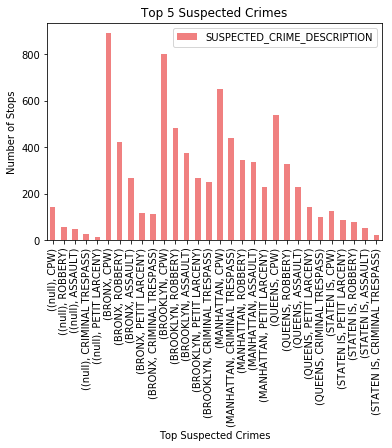

In [25]:
crime.plot(kind = "bar", colors = ["lightcoral", "gold", "palegreen", "lightskyblue", "violet"])
plt.title("Top 5 Suspected Crimes")
plt.xlabel("Top Suspected Crimes")
plt.ylabel("Number of Stops")


In [50]:
cpw = pd.DataFrame(cpw_df["STOP_LOCATION_BORO_NAME"].value_counts())
cpw.columns = ["Boro"]

robbery = pd.DataFrame(robbery_df["STOP_LOCATION_BORO_NAME"].value_counts())
robbery.columns = ["Boro"]

assault = pd.DataFrame(assault_df["STOP_LOCATION_BORO_NAME"].value_counts())
assault.columns = ["Boro"]

criminal_trespass = pd.DataFrame(criminal_trespass_df["STOP_LOCATION_BORO_NAME"].value_counts())
criminal_trespass.columns = ["Boro"]

petit = pd.DataFrame(petit_df["STOP_LOCATION_BORO_NAME"].value_counts())
petit.columns = ["Boro"]




In [51]:
suspected_df = pd.concat([cpw, robbery, assault, criminal_trespass, petit], axis=1)

#day_df = day_df.reset_index()
suspected_df.columns = ['CPW', 'Robbery', 'Assault', 'Criminal Trespass', 'Petty Larcany']

C:\Users\cobin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [52]:
suspected_df

,CPW,Robbery,Assault,Criminal Trespass,Petty Larcany
(null),142,55,48,25,12
BRONX,892,421,268,114,115
BROOKLYN,800,483,376,251,266
MANHATTAN,651,344,335,442,231
QUEENS,541,327,227,100,143
STATEN IS,125,78,53,24,85


In [55]:
new_index= ["BRONX", "BROOKLYN", "MANHATTAN", "QUEENS", "STATEN IS", "(null)"]
suspected_df = suspected_df.reindex(new_index)

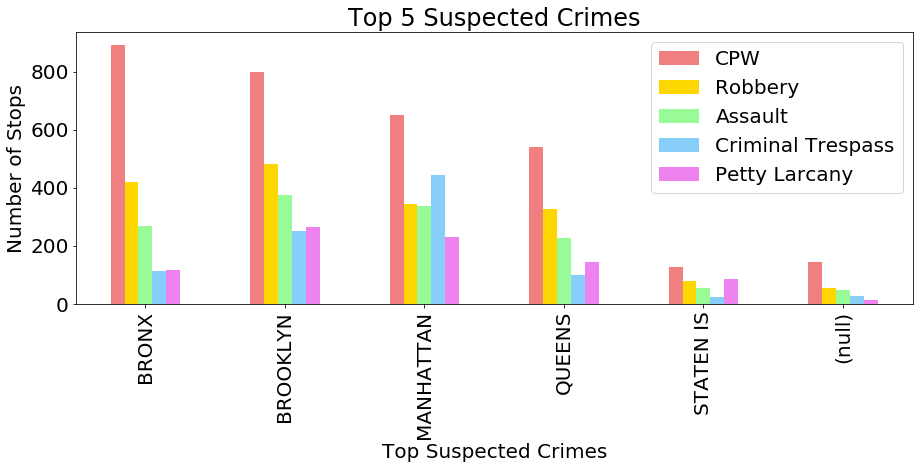

In [81]:
plt.rcParams.update({'font.size': 20})
suspected_df.plot(kind="bar", colors=["lightcoral", "gold", "palegreen", "lightskyblue", "violet"], figsize=(15,5))
plt.title("Top 5 Suspected Crimes")
plt.xlabel("Top Suspected Crimes")
plt.ylabel("Number of Stops")
plt.savefig("Suspected Crime vs Boro.png")
plt.show()